<a href="https://colab.research.google.com/github/M3thsara/M3thsara-Image-Processing-and-Machine-Vision/blob/A01-Intensity-Transformations-and-Neighborhood-Filtering/A01_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Intensity Transformation**

In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


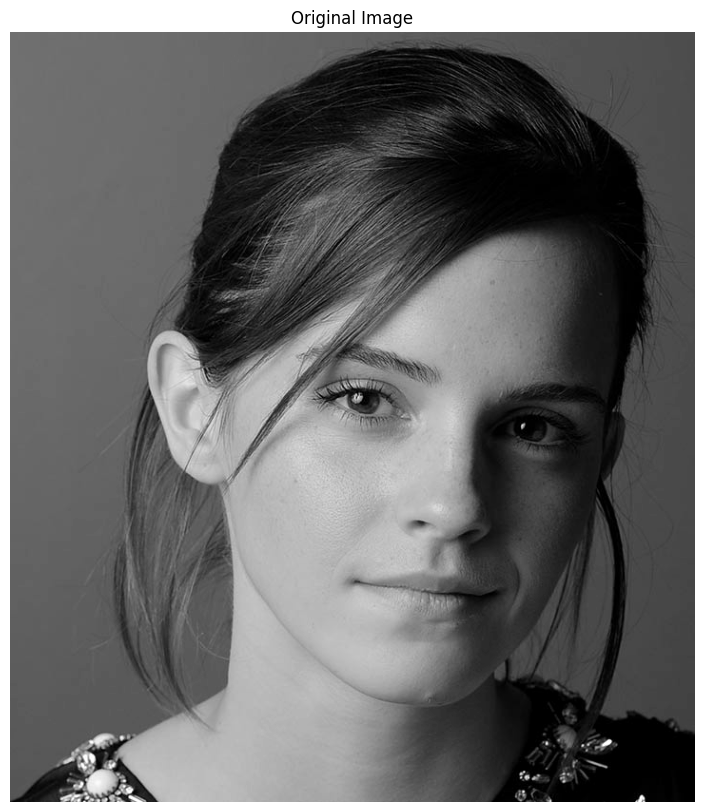

In [42]:
import cv2 as cv     #open opencv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert image is not None

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

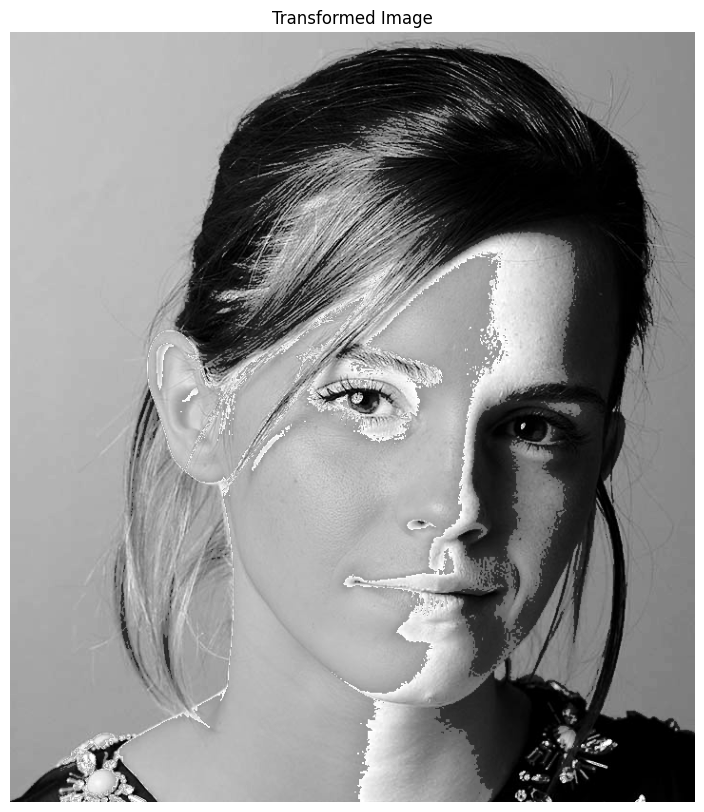

In [43]:
# Define the intensity transformation function based on line equations

def intensity_transformation(pixel_value):

    if 0 <= pixel_value <= 50:
        return pixel_value                                                      # y = x for 0 <= x <= 50

    elif 50 < pixel_value <= 150:
        return 1.55 * pixel_value + 22.5                                        # y = 1.55x + 22.5  for 50 < x <= 150

    elif 150 < pixel_value <= 255:
        return pixel_value                                                      # y = x for  150 < x <= 255

# Create an empty array (same size as the image) to store the transformed pixel values.

transformed_image = np.zeros(image.shape, dtype=np.uint8)

# Loop through every pixel in the image and apply the transformation

for i in range(image.shape[0]):                                                 # Loop over the image rows
    for j in range(image.shape[1]):                                             # Loop over the image columns
        transformed_image[i, j] = intensity_transformation(image[i, j])

# Show the transformed image

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')
plt.axis('off')
plt.show()


# **2. Accentuate matter**

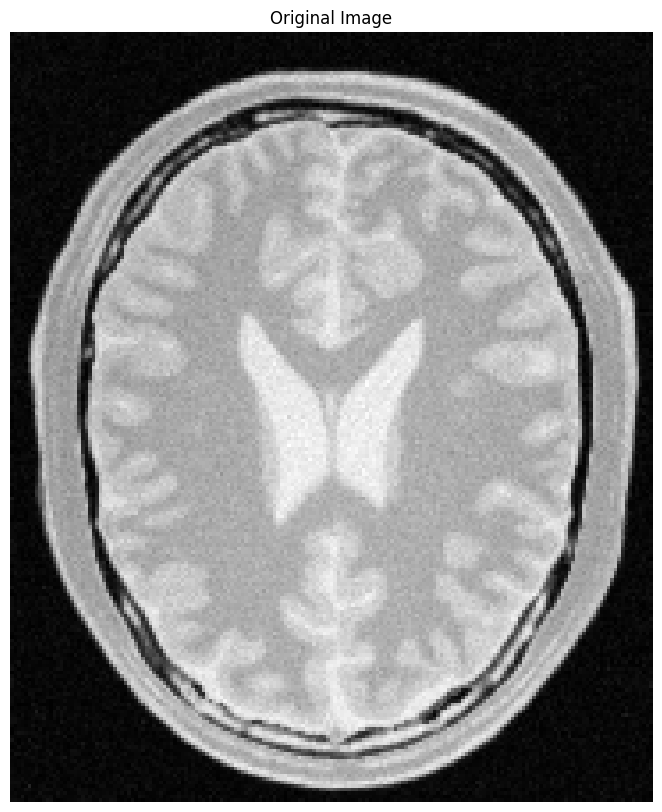

In [45]:
image2 = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/a1images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert image2 is not None

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Original Image')
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()

Gray Matter Intensity: (65, 108): 199
White Matter Intensity: (125, 120): 155


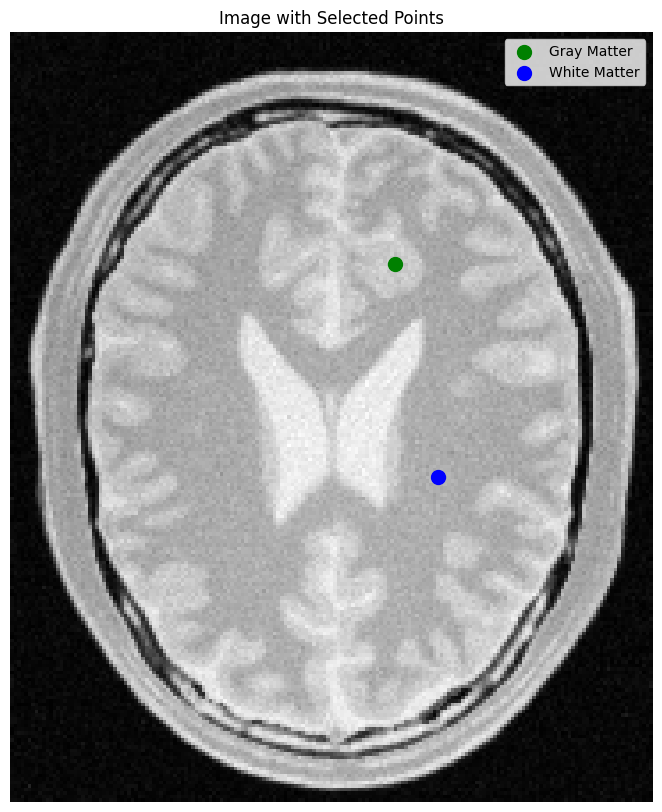

In [46]:
# Measure the intensity at the specified locations

#coordinates (row, column)
location1 = (65, 108)
location2 = (125, 120)

# Intensity at locations
intensity1 = image2[location1]
intensity2 = image2[location2]

# Print the results
print(f'Gray Matter Intensity: {location1}: {intensity1}')
print(f'White Matter Intensity: {location2}: {intensity2}')

plt.figure(figsize=(10, 10))
plt.title('Image with Selected Points')
plt.imshow(image2, cmap='gray')

plt.scatter(location1[1], location1[0], color='green', marker='o', s=100, label='Gray Matter')
plt.scatter(location2[1], location2[0], color='blue', marker='o', s=100, label='White Matter')
plt.axis('off')
plt.legend()

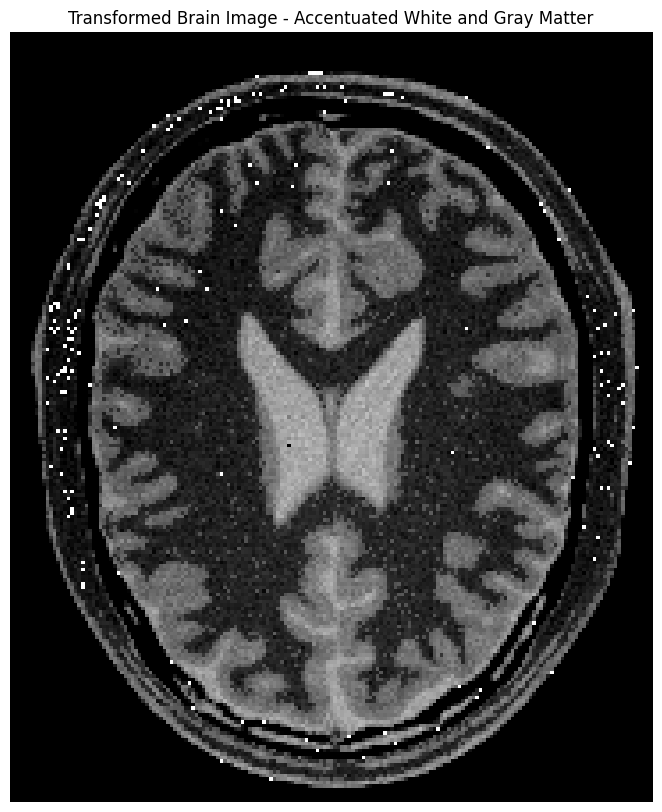

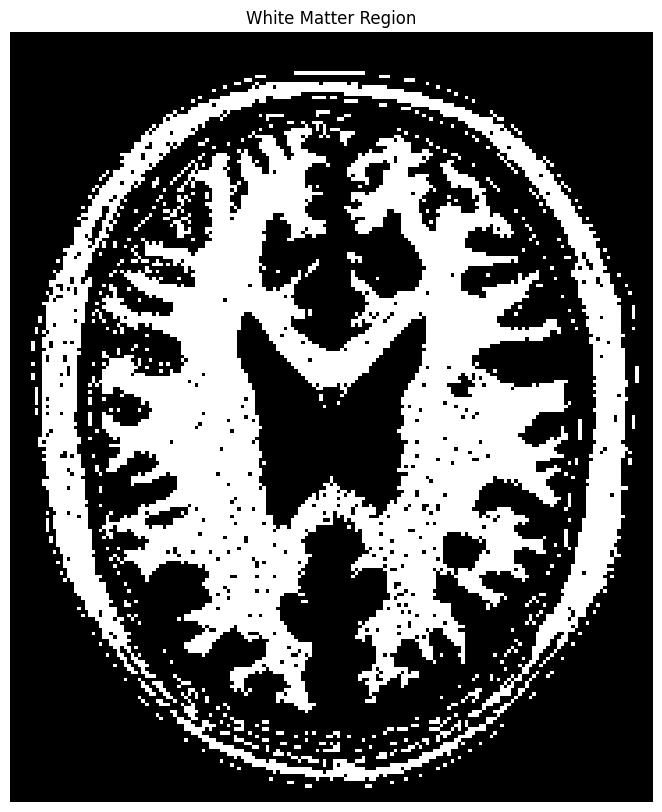

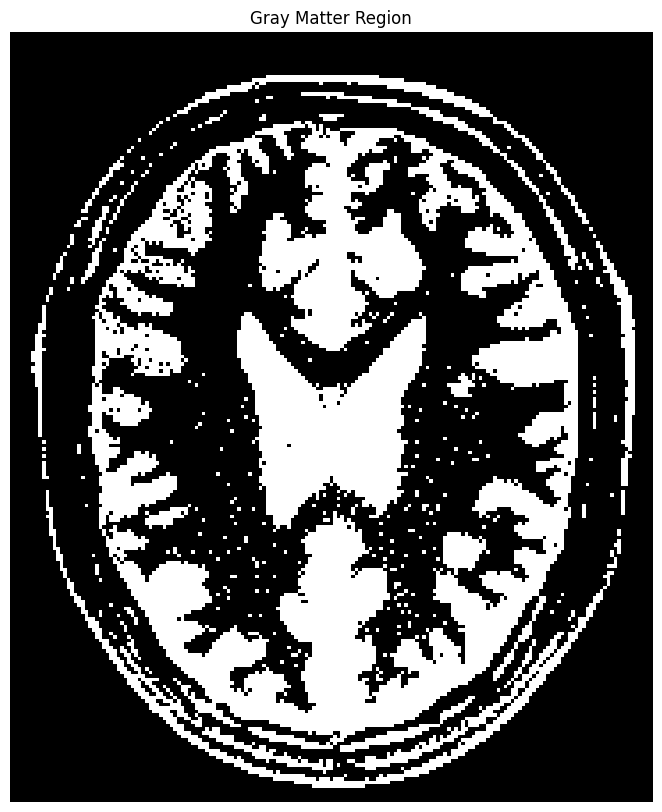

In [53]:
# Function to transform pixel intensities for white and gray matter in brain images

def accentuate_matter(image_):

    # Create an empty array to store the transformed pixel values.
    transformed_image = np.zeros(image_.shape, dtype=np.uint8)

    # Transform gray matter intensities (181 to 250)
    gray_matter_region = (image_ >= 181) & (image_ <= 250)
    transformed_image[gray_matter_region] = 1.7 * image_[gray_matter_region] + 28

    # Transform white matter intensities (145 to 180)
    white_matter_region = (image_ >= 145) & (image_ <= 180)
    transformed_image[white_matter_region] = 1.6 * image_[white_matter_region] + 20

    return transformed_image, white_matter_region, gray_matter_region

# Apply the transform function to the image

transformed_brain_image, white_matter_region, gray_matter_region = accentuate_matter(image2)

# Display the transformed brain image

plt.figure(figsize=(10, 10))
plt.imshow(transformed_brain_image, cmap='gray')
plt.title("Transformed Brain Image - Accentuated White and Gray Matter")
plt.axis('off')
plt.show()

# Display the white matter region

plt.figure(figsize=(10, 10))
plt.imshow(white_matter_region, cmap='gray')
plt.title("White Matter Region")
plt.axis('off')
plt.show()

# Display the gray matter region

plt.figure(figsize=(10, 10))
plt.imshow(gray_matter_region, cmap='gray')
plt.title("Gray Matter Region")
plt.axis('off')
plt.show()